#Intro and Overview

##Spotify Music

We are going to be using [data](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024/data) from spotify's top played songs of 2024.

The Variables include:

- Track: title of the song
- Album Name: album on which the track appears
- Artist: primary performing artist
- Release Date: original public release date (MM/DD/YYYY)
- ISRC: International Standard Recording Code (unique identifier for the recording)
- All Time Rank: song’s rank among all tracks in the dataset (1 = highest)
- Track Score: composite success score (0 - 1000) combining multi-platform metrics
- Spotify Streams: cumulative stream count on Spotify
- Spotify Playlist Count: number of Spotify playlists that include the track
- Spotify Playlist Reach: total follower reach of those Spotify playlists
- Spotify Popularity: Spotify popularity index (0 - 100)
- YouTube Views: cumulative views of the official video(s) on YouTube
- YouTube Likes: likes on the official YouTube video(s)
- TikTok Posts: number of TikTok videos using the track’s audio
- TikTok Likes: total likes across those TikTok videos
- TikTok Views: total views across those TikTok videos
- YouTube Playlist Reach: subscriber reach of YouTube playlists featuring the song
- Apple Music Playlist Count: Apple Music playlists that include the track
- AirPlay Spins: terrestrial-radio spins detected (e.g., Nielsen BDS)
- SiriusXM Spins: spins on SiriusXM satellite-radio channels
- Deezer Playlist Count: Deezer playlists featuring the track
- Deezer Playlist Reach: follower reach of those Deezer playlists
- Amazon Playlist Count: Amazon Music playlists containing the song
- Pandora Streams: cumulative streams on Pandora
- Pandora Track Stations: number of Pandora user stations seeded by the track
- Soundcloud Streams: cumulative streams on SoundCloud
- Shazam Counts: times users have identified the song with Shazam
- TIDAL Popularity: TIDAL popularity index (0 - 100)
- Explicit Track: 1 if the song is flagged “explicit,” 0 if it is clean



In [ ]:
#packages

import warnings
warnings.filterwarnings('ignore')

# data imports
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.decomposition import PCA
import seaborn as sb

# modeling imports
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

import os
from skimage import io
from skimage.transform import resize
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

%matplotlib inline

In [ ]:
# dataset and cleaning

data = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding='latin-1')

data.isna().sum()
data = data.drop(columns = ['TIDAL Popularity'])
data.dropna(inplace=True)
data.reset_index(drop=True)

summary = data.describe()
print(summary)

       Track Score  Spotify Popularity  Apple Music Playlist Count  \
count   565.000000          565.000000                  565.000000   
mean     61.544425           69.722124                   89.886726   
std      65.000014           11.175532                   85.325438   
min      19.500000            6.000000                    3.000000   
25%      28.100000           65.000000                   32.000000   
50%      40.700000           71.000000                   63.000000   
75%      69.700000           76.000000                  122.000000   
max     725.400000           95.000000                  859.000000   

       Deezer Playlist Count  Amazon Playlist Count  Explicit Track  
count             565.000000             565.000000      565.000000  
mean               42.557522              35.398230        0.405310  
std                59.133480              32.222118        0.491387  
min                 1.000000               1.000000        0.000000  
25%                

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",0
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,USAT22311371,6,410.1,"670,665,438","105,892","175,421,034",...,"522,042","4,654",86.0,"17,167,254",152.0,"138,529,362","50,982","9,438,601","4,517,131",1
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,USSM12404354,10,330.6,"90,676,573","10,400","184,199,419",...,"3,823",117,78.0,"10,800,098",92.0,"1,005,626",842,"3,679,709","666,302",1


PROF NOTES ON QUESTION: Looks good

##Question 1: Using the metrics, is the Spotify Playlist Count or Spotify Playlist Reach the better predictor of Spotify Streams?

###Variables Involved:
Spotify Streams (continuous), Spotify Playlist Count (continuous), Spotify Playlist (continuous)

###Cleaning:
Missing values will be dropped, and both predictors (Spotify Playlist Count and Spotify Playlist Reach) will be z-scored.

###Modeling/Computation:
I will use a train/test split with an 80/20 division to fit two linear regression models to predict Spotify Streams: A model with only Spotify Playlist Count, and a model with only Spotify Playlist Reach. R² scores on both the training and test sets will be compared to determine which predictor provides better explanatory power.

###Graphs:
- A bar chart displaying train and test R² scores for both model
- A scatterplot of the better predictor against Spotify Streams to visualize the strength and direction of the relationship


In [ ]:
# Train-Test-Split Model Validation with an 80/20 split

for column in ['Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Streams']:
    data[column] = pd.to_numeric(data[column].astype(str).str.replace(',', ''))

x = data[['Spotify Playlist Count', 'Spotify Playlist Reach']]
y = data['Spotify Streams']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 50)

In [ ]:
# Z-score predictors

scaler = StandardScaler()

xc_train = scaler.fit_transform(x_train[['Spotify Playlist Count']])
xc_test  = scaler.transform(x_test[['Spotify Playlist Count']])

xr_train = scaler.fit_transform(x_train[['Spotify Playlist Reach']])
xr_test  = scaler.transform(x_test[['Spotify Playlist Reach']])

In [ ]:
# Linear Regression Model

lin = LinearRegression()

lin_count = LinearRegression().fit(xc_train, y_train)
lin_reach = LinearRegression().fit(xr_train, y_train)

In [ ]:
# R2

r2_count_train = lin_count.score(xc_train, y_train)
r2_count_test  = lin_count.score(xc_test,  y_test)
r2_reach_train = lin_reach.score(xr_train, y_train)
r2_reach_test  = lin_reach.score(xr_test,  y_test)

print("R2 for Spotify Playlist Count (Train):", r2_count_train)
print("R2 for Spotify Playlist Count (Test):", r2_count_test)
print("\n")
print("R2 for Spotify Playlist Reach (Train):", r2_reach_train)
print("R2 for Spotify Playlist Reach (Test):", r2_reach_test)

R2 for Spotify Playlist Count (Train): 0.7252224229850217
R2 for Spotify Playlist Count (Test): 0.738661282806587


R2 for Spotify Playlist Reach (Train): 0.24054480026021774
R2 for Spotify Playlist Reach (Test): 0.3172978517290136


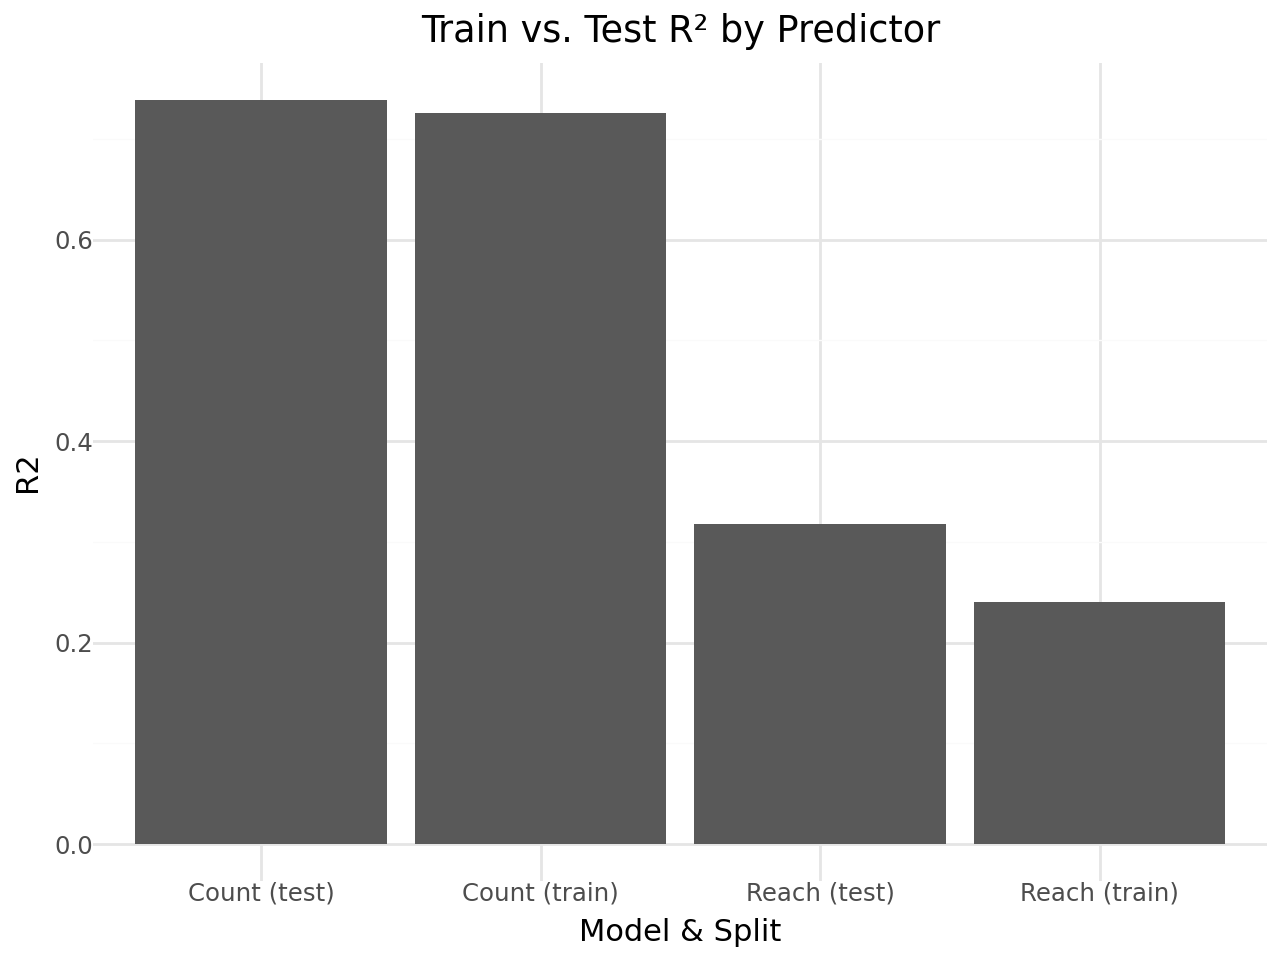

In [ ]:
# Bar Chart

r2 = pd.DataFrame({
    'Model': ['Count (train)', 'Count (test)', 'Reach (train)', 'Reach (test)'],
    'R2':[r2_count_train,   r2_count_test,   r2_reach_train,   r2_reach_test]})

(ggplot(r2, aes(x='Model', y='R2'))
    + geom_col()
    + labs(x='Model & Split', y='R2', title='Train vs. Test R² by Predictor')
    + theme_minimal())

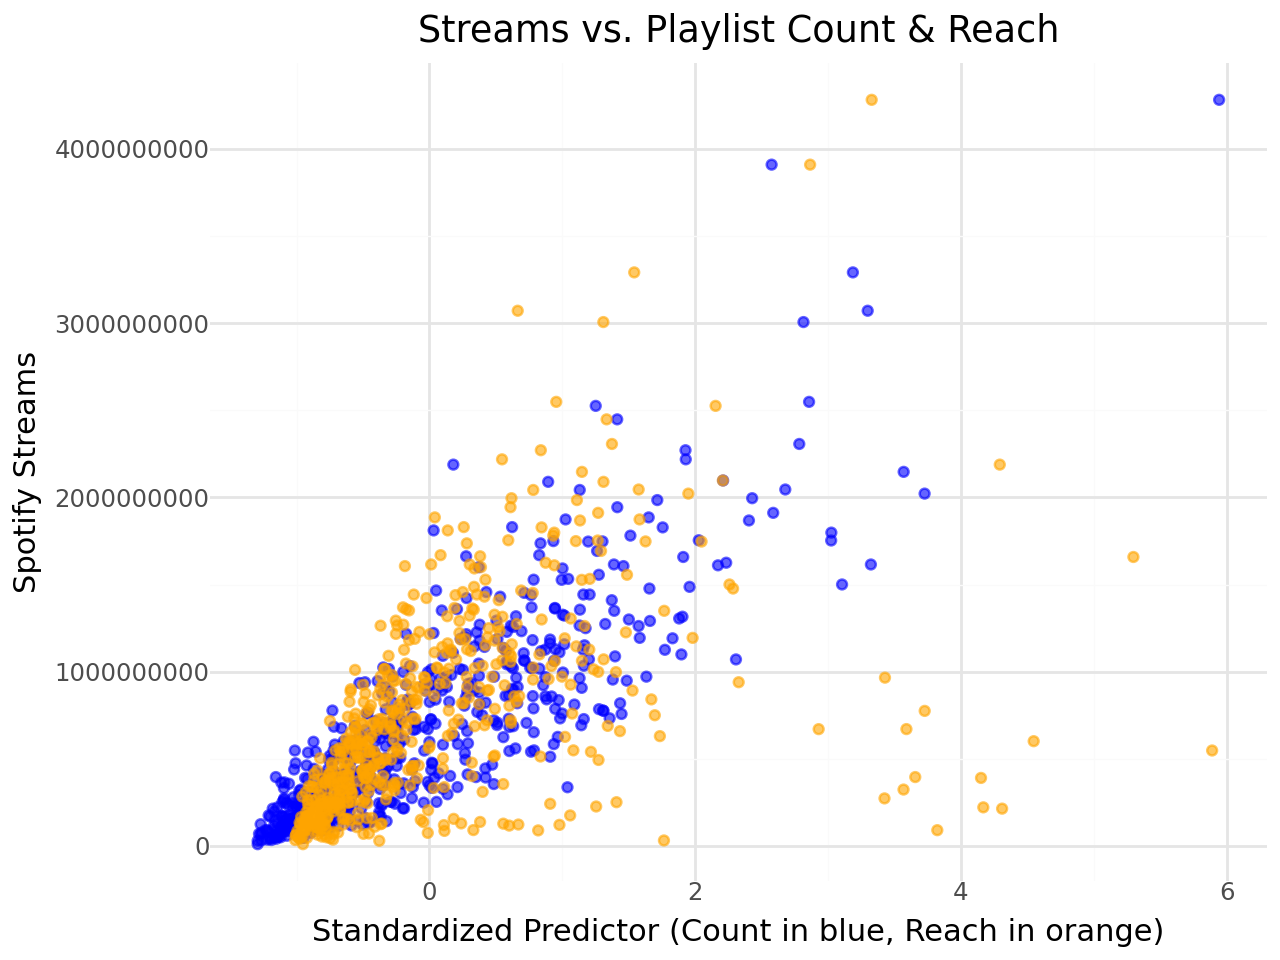

In [ ]:
# Scatterplot

data['count'] = StandardScaler().fit_transform(data[['Spotify Playlist Count']])
data['reach'] = StandardScaler().fit_transform(data[['Spotify Playlist Reach']])

(ggplot(data)
    + geom_point(aes(x='count', y='Spotify Streams'), color='blue', alpha = 0.6)
    + geom_point(aes(x='reach', y='Spotify Streams'), color='orange', alpha = 0.6)
    + labs(
        x='Standardized Predictor (Count in blue, Reach in orange)',
        y='Spotify Streams',
        title='Streams vs. Playlist Count & Reach')
    + theme_minimal())

PROF NOTES ON QUESTION: Why degree 2? Could be interesting to test multiple degrees!

##Question 2: With an 80/20 train-test split, how accurately do different degrees of polynomial regression predict Spotify Streams? What are the MSE, MAE, and R² for each model on training and testing sets, and do they indicate signs of overfitting?

###Variables Involved:
Spotify Streams (continuous, as the target variable), Predictors: all other variables except Spotify Streams.

###Cleaning:
Drop missing values, z-score all continuous predictor variables for both models, convert categorial variables into dummy variables.

###Modeling/Computation:
I will use se an 80/20 train/test split to fit two models to predict Spotify Streams with Polynomial Regression using polynomial transformed predictors with degree 2, 3, and 4. Then, I will compute and compare the following metrics on both the training and testing sets for each model: Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score. Signs of overfitting by comparing training vs. testing performance will be assessed. A model that performs significantly better on the training set but poorly on the test set is likely overfitting.

###Graphs:
- A line chart comparing MSE, MAE, and R² for each model on both training and testing sets.
- A scatterplot of actual vs. predicted Spotify Streams for each model (separately) to visualize prediction fit.


In [ ]:
# Train-Test-Split Model Validation with an 80/20 split

predictors = ['All Time Rank','Track Score','Spotify Playlist Count','Spotify Playlist Reach','AirPlay Spins','SiriusXM Spins','Deezer Playlist Count',
              'Deezer Playlist Reach','Amazon Playlist Count','Pandora Streams','Pandora Track Stations','Soundcloud Streams','Shazam Counts', 'Explicit Track']

x = data[predictors]

y = data['Spotify Streams']

continuous = ['All Time Rank','Track Score','Spotify Playlist Count','Spotify Playlist Reach','AirPlay Spins','SiriusXM Spins','Deezer Playlist Count',
              'Deezer Playlist Reach','Amazon Playlist Count','Pandora Streams','Pandora Track Stations','Soundcloud Streams','Shazam Counts']

for column in continuous:
    x[column] = x[column].astype(str).str.replace(',', '').astype(float)

y = pd.to_numeric(y.astype(str).str.replace(',', '', regex=True))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 50)

In [ ]:
# Z-score continuous predictors & convert categorial variables into dummy variables

scaler = StandardScaler()

x_train = pd.get_dummies(x_train, columns=['Explicit Track'])
x_test = pd.get_dummies(x_test, columns=['Explicit Track'])

x_train[continuous] = scaler.fit_transform(x_train[continuous])
x_test[continuous] = scaler.transform(x_test[continuous])

In [ ]:
# Degree-2 polynomial

poly2 = PolynomialFeatures(degree=2, include_bias=False)
x_train_p2 = poly2.fit_transform(x_train)
x_test_p2 = poly2.transform(x_test)

lin_p2 = LinearRegression().fit(x_train_p2, y_train)
y_pred_p2 = lin_p2.predict(x_test_p2)
y_pred_train_p2 = lin_p2.predict(x_train_p2)

# Degree-3 polynomial

poly3 = PolynomialFeatures(degree=3, include_bias=False)
x_train_p3 = poly3.fit_transform(x_train)
x_test_p3 = poly3.transform(x_test)

lin_p3 = LinearRegression().fit(x_train_p3, y_train)
y_pred_p3 = lin_p3.predict(x_test_p3)
y_pred_train_p3 = lin_p3.predict(x_train_p3)

# Degree-4 polynomial

poly4 = PolynomialFeatures(degree=4, include_bias=False)
x_train_p4 = poly4.fit_transform(x_train)
x_test_p4  = poly4.transform(x_test)

lin_p4 = LinearRegression().fit(x_train_p4, y_train)
y_pred_p4 = lin_p4.predict(x_test_p4)
y_pred_train_p4 = lin_p4.predict(x_train_p4)


In [ ]:
# Calculate the MSE, MAE, and  𝑅2  for the testing sets of the models

print("Test Metrics")

print("\nPolynomial Regression (degree 2):")
print("  MSE: ", mean_squared_error(y_test, y_pred_p2))
print("  MAE: ", mean_absolute_error(y_test, y_pred_p2))
print("  R² : ", r2_score(y_test, y_pred_p2))

print("\nPolynomial Regression (degree 3):")
print("  MSE: ", mean_squared_error(y_test, y_pred_p3))
print("  MAE: ", mean_absolute_error(y_test, y_pred_p3))
print("  R² : ", r2_score(y_test, y_pred_p3))

print("\nPolynomial Regression (degree 4):")
print("  MSE: ", mean_squared_error(y_test, y_pred_p4))
print("  MAE: ", mean_absolute_error(y_test, y_pred_p4))
print("  R² : ", r2_score(y_test, y_pred_p4))

Test Metrics

Polynomial Regression (degree 2):
  MSE:  2.4587645747057258e+17
  MAE:  250712030.1902587
  R² :  0.4085097628737462

Polynomial Regression (degree 3):
  MSE:  1.6731373647202242e+20
  MAE:  4978441486.419375
  R² :  -401.49661426881636

Polynomial Regression (degree 4):
  MSE:  3.8763075497083214e+20
  MAE:  3992561146.242264
  R² :  -931.5000430452654


In [ ]:
# Calculate the MSE, MAE, and  𝑅2  for the training sets of the models

print("Train Metrics")

print("\nPolynomial Regression (degree 2):")
print("  MSE: ", mean_squared_error(y_train, y_pred_train_p2))
print("  MAE: ", mean_absolute_error(y_train, y_pred_train_p2))
print("  R² : ", r2_score(y_train, y_pred_train_p2))

print("\nPolynomial Regression (degree 3):")
print("  MSE: ", mean_squared_error(y_train, y_pred_train_p3))
print("  MAE: ", mean_absolute_error(y_train, y_pred_train_p3))
print("  R² : ", r2_score(y_train, y_pred_train_p3))

print("\nPolynomial Regression (degree 4):")
print("  MSE: ", mean_squared_error(y_train, y_pred_train_p4))
print("  MAE: ", mean_absolute_error(y_train, y_pred_train_p4))
print("  R² : ", r2_score(y_train, y_pred_train_p4))

Train Metrics

Polynomial Regression (degree 2):
  MSE:  2.098800627369967e+16
  MAE:  111419014.69117223
  R² :  0.9344355689752764

Polynomial Regression (degree 3):
  MSE:  4.8612078374498625e-09
  MAE:  3.2646202408106984e-05
  R² :  1.0

Polynomial Regression (degree 4):
  MSE:  2.752724599296656e-08
  MAE:  9.939865728395175e-05
  R² :  1.0


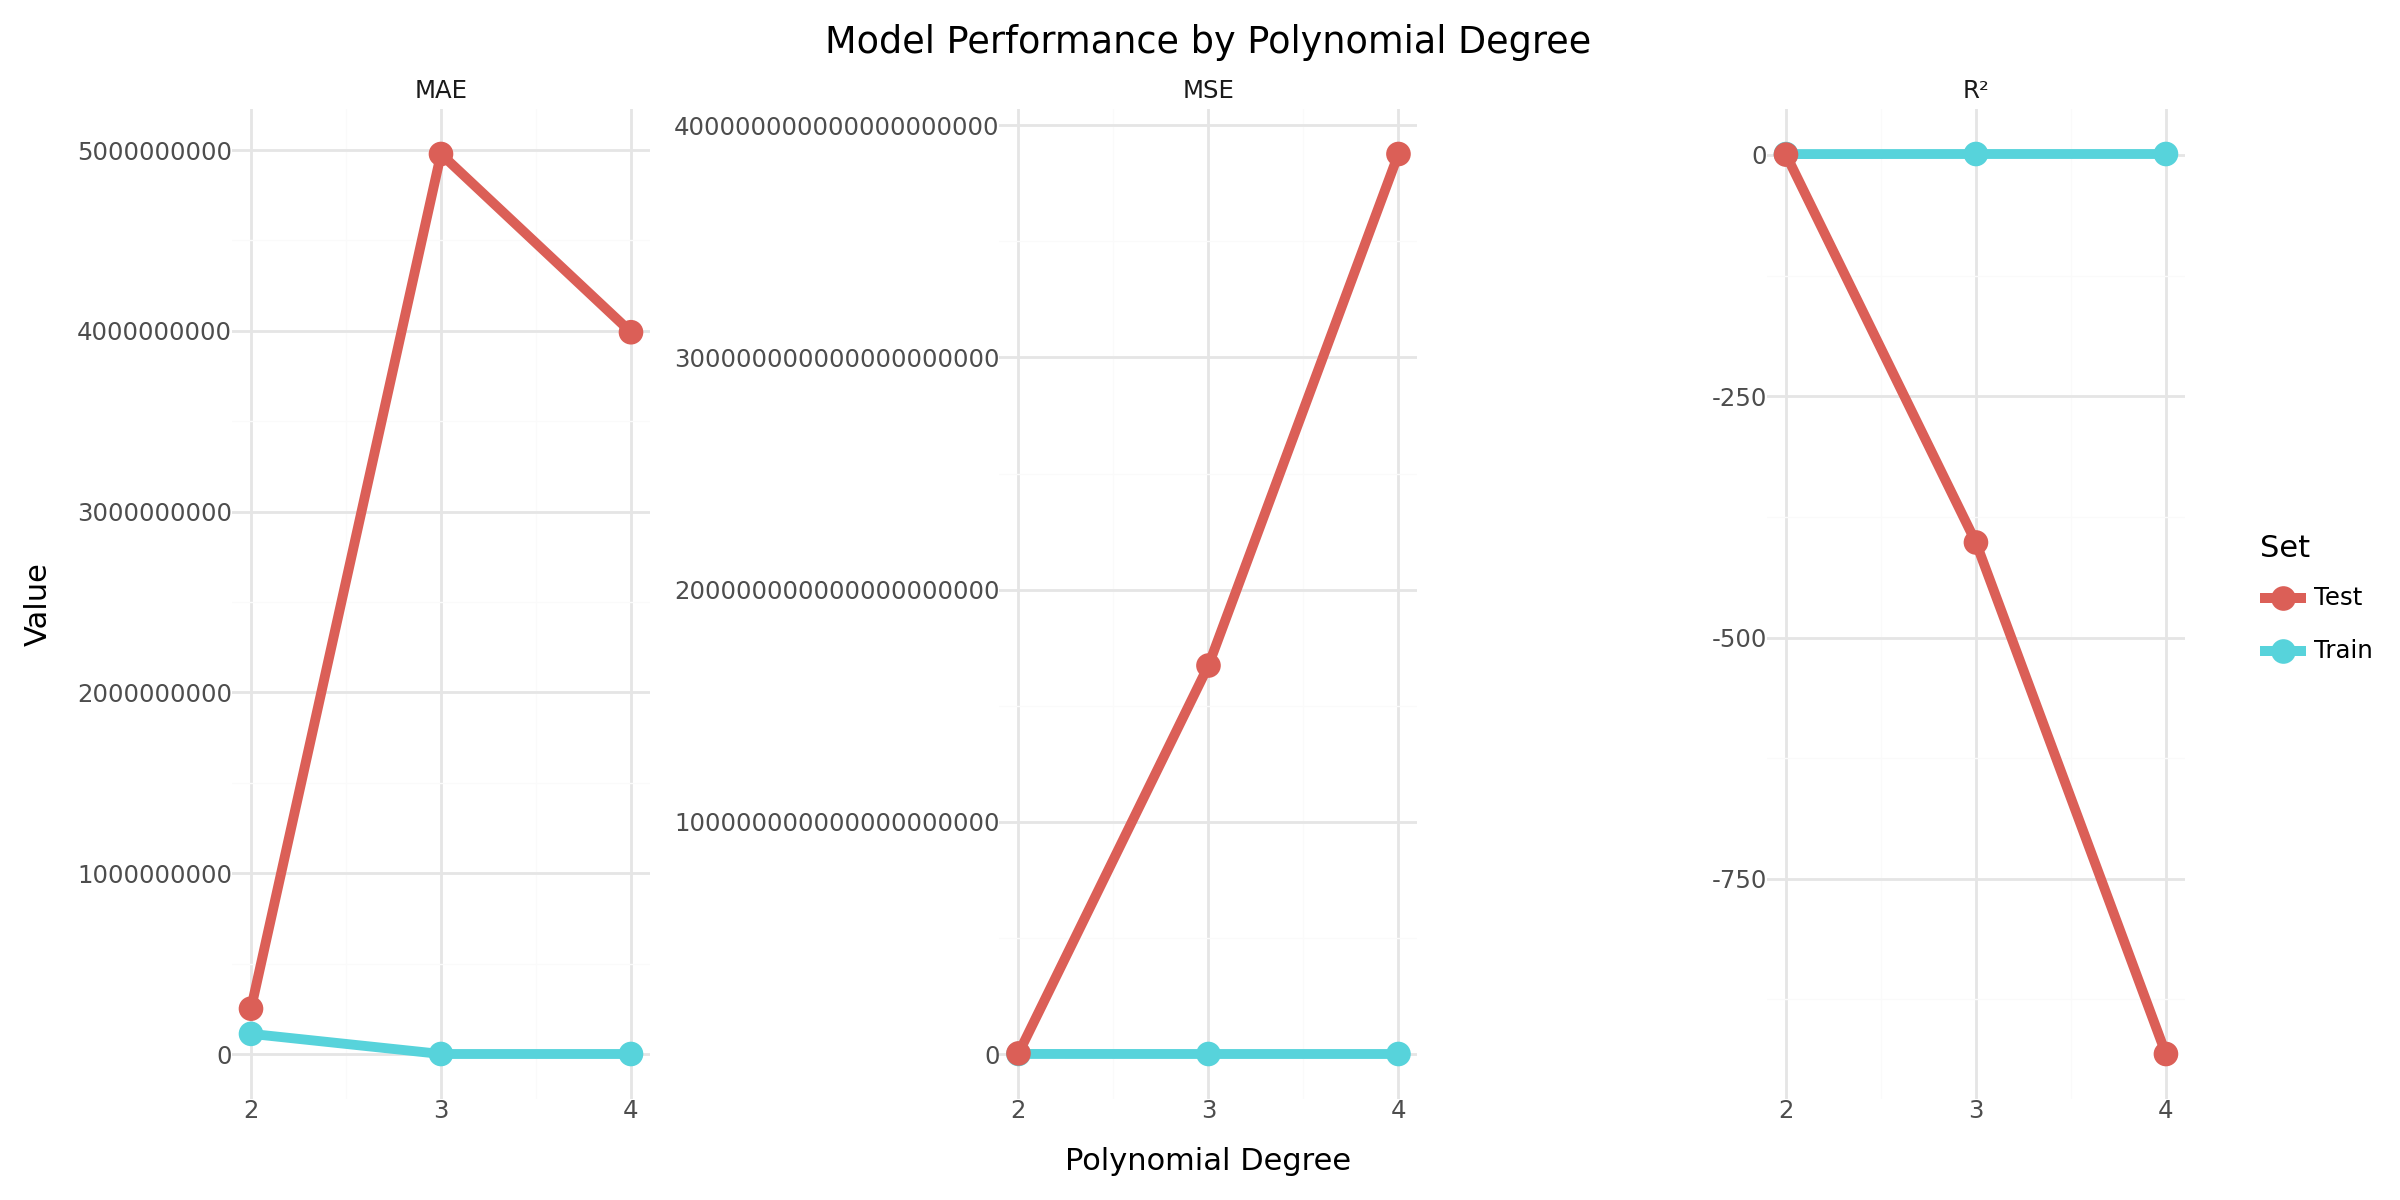

In [ ]:
# Line Chart

degrees = [2, 3, 4]

metrics = {
    'R²': {
        'Train': [
            r2_score(y_train, y_pred_train_p2),
            r2_score(y_train, y_pred_train_p3),
            r2_score(y_train, y_pred_train_p4)
        ],
        'Test': [
            r2_score(y_test, y_pred_p2),
            r2_score(y_test, y_pred_p3),
            r2_score(y_test, y_pred_p4)
        ]
    },
    'MSE': {
        'Train': [
            mean_squared_error(y_train, y_pred_train_p2),
            mean_squared_error(y_train, y_pred_train_p3),
            mean_squared_error(y_train, y_pred_train_p4)
        ],
        'Test': [
            mean_squared_error(y_test, y_pred_p2),
            mean_squared_error(y_test, y_pred_p3),
            mean_squared_error(y_test, y_pred_p4)
        ]
    },
    'MAE': {
        'Train': [
            mean_absolute_error(y_train, y_pred_train_p2),
            mean_absolute_error(y_train, y_pred_train_p3),
            mean_absolute_error(y_train, y_pred_train_p4)
        ],
        'Test': [
            mean_absolute_error(y_test, y_pred_p2),
            mean_absolute_error(y_test, y_pred_p3),
            mean_absolute_error(y_test, y_pred_p4)]}}

rows = []
for metric_name, sets in metrics.items():
    for set_name, values in sets.items():
        for degree, value in zip(degrees, values):
            rows.append({
                'Degree': degree,
                'Set': set_name,
                'Value': value,
                'Metric': metric_name})

df_all = pd.DataFrame(rows)

plot = (
    ggplot(df_all, aes(x='Degree', y='Value', color='Set')) +
    geom_line(size=2) +
    geom_point(size=4) +
    facet_wrap('~Metric', scales='free_y') +
    labs(
        title='Model Performance by Polynomial Degree',
        x='Polynomial Degree',
        y='Value'
    ) +
    scale_x_continuous(breaks=degrees) +
    theme_minimal() +
    theme(figure_size=(12, 6)))

display(plot)


In [ ]:
# Scatterplot

(ggplot(scatter_data, aes(x='Actual', y='Predicted'))
 + geom_point(alpha=0.5, color='blue')
 + geom_abline(intercept=0, slope=1, linetype='dashed', color='red')
 + facet_wrap('~Model')
 + labs(title='Actual vs. Predicted Spotify Streams by Polynomial Degree',
        x='Actual Spotify Streams',
        y='Predicted Spotify Streams')
 + theme_minimal()
 + theme(axis_text_x=element_text(rotation=45, ha='right')))

NameError: name 'scatter_data' is not defined

PROF NOTES ON QUESTION: I think it could be nice to make the second graph a box or violin plot to show the distribution of track scores, instead of just the average


##Question 3: For the five most popular artists in the dataset that appear the most, how does their average Track Score compare with the average Track Score of all remaining tracks in the dataset?

###Variables Involved:
Artists (Categorical), Track Score (Continuous)

###Cleaning:
Any missing values will be dropped and we don’t need to z-score anything because we are not predicting anything we are only observing

###Computation:
I will use [‘artist’].value_counts().nlargest(5).index.tolist() to get the top 5 artists that appear on the list the most. I will then make two separate dataframes one with only the top 5 artists and it's data and one without the top 5 artists. I will then find the mean of each of the track scores of each data frame.

###Graph:
- I will then make a histogram so we can see the visual differences of each of means. Then I will make my conclusions after.
- For fun I will make a scatter plot comparing Track Score and ammount of streams and labeling top 5 artist points blue and not top 5 artist points red. This will give us a better visual seeing how much better top 5 artists that show up most on the list perform in their songs and the ammount plays compared to the track score.
- For fun I will make a bar chart of the top 5 artists and their average track score to see which artists have the highest ratings!


In [ ]:
#Finding out the top 5 artists
top_5 = data['Artist'].value_counts().nlargest(5).index.tolist()
print(top_5)

['The Weeknd', 'Billie Eilish', 'Morgan Wallen', 'Drake', 'Taylor Swift']


In [ ]:
#Making two different dataframes one with only top 5 artists and one without the top 5

top_5_df = data[data['Artist'].isin(top_5)]
other_artists_df = data[~data['Artist'].isin(top_5)]

top_5_mean = top_5_df['Track Score'].mean()
other_artists_mean = other_artists_df['Track Score'].mean()

print("Average Track Score for Top 5 Artists:", top_5_mean)
print("Average Track SCore for Top 5 Aritists:", other_artists_mean)

Average Track Score for Top 5 Artists: 74.75384615384615
Average Track SCore for Top 5 Aritists: 60.20545808966861


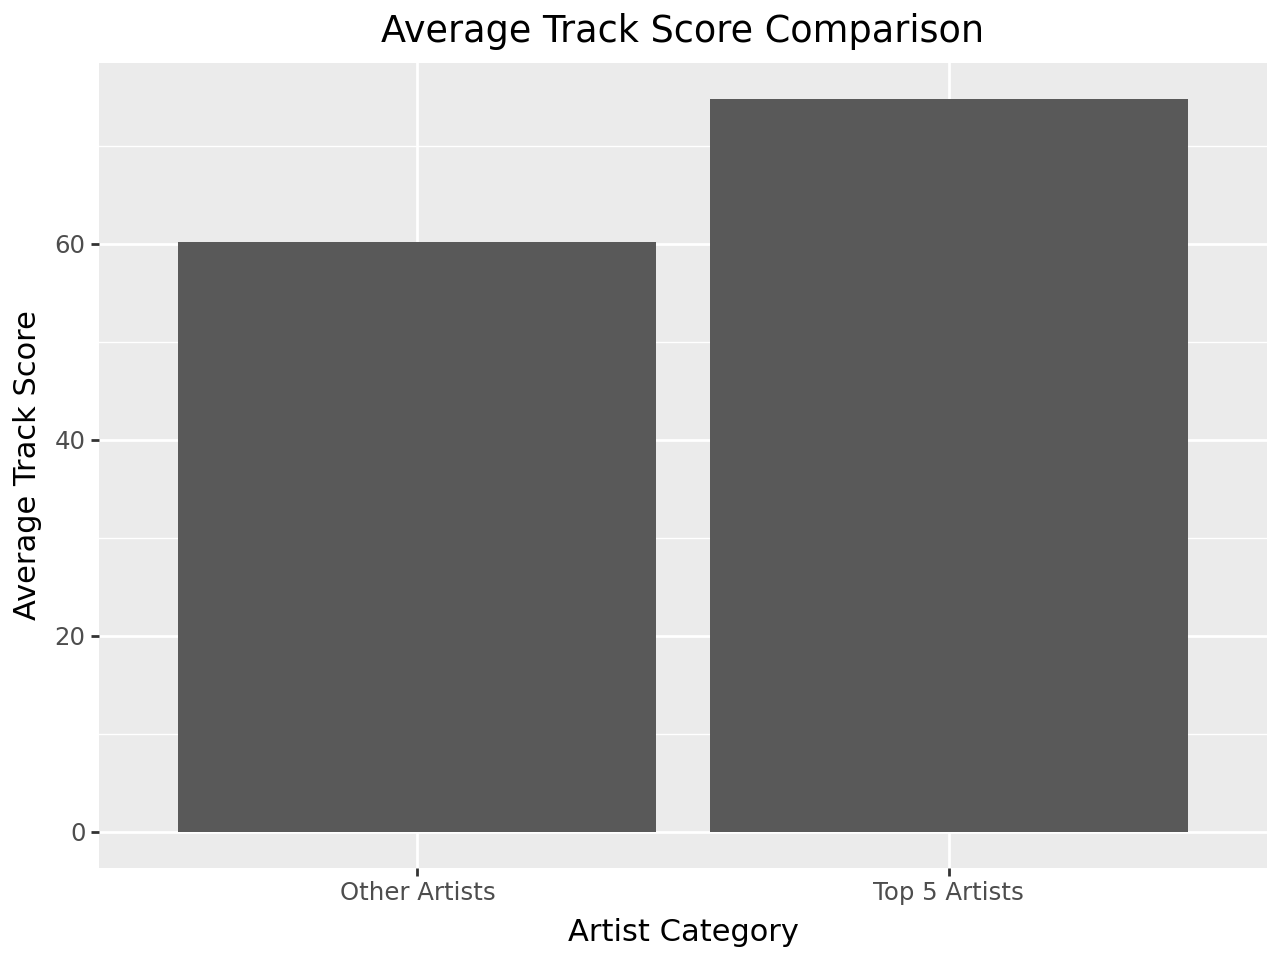

In [ ]:
#Creating the GGplot

df_averages = pd.DataFrame({
    'Artist Category': ['Top 5 Artists', 'Other Artists'],
    'Average Track Score': [top_5_mean, other_artists_mean]
})

(ggplot(df_averages, aes(x = 'Artist Category', y = 'Average Track Score'))
+ geom_bar(stat = 'identity', position = 'dodge')
+ labs(title = 'Average Track Score Comparison', x = 'Artist Category', y = 'Average Track Score'))

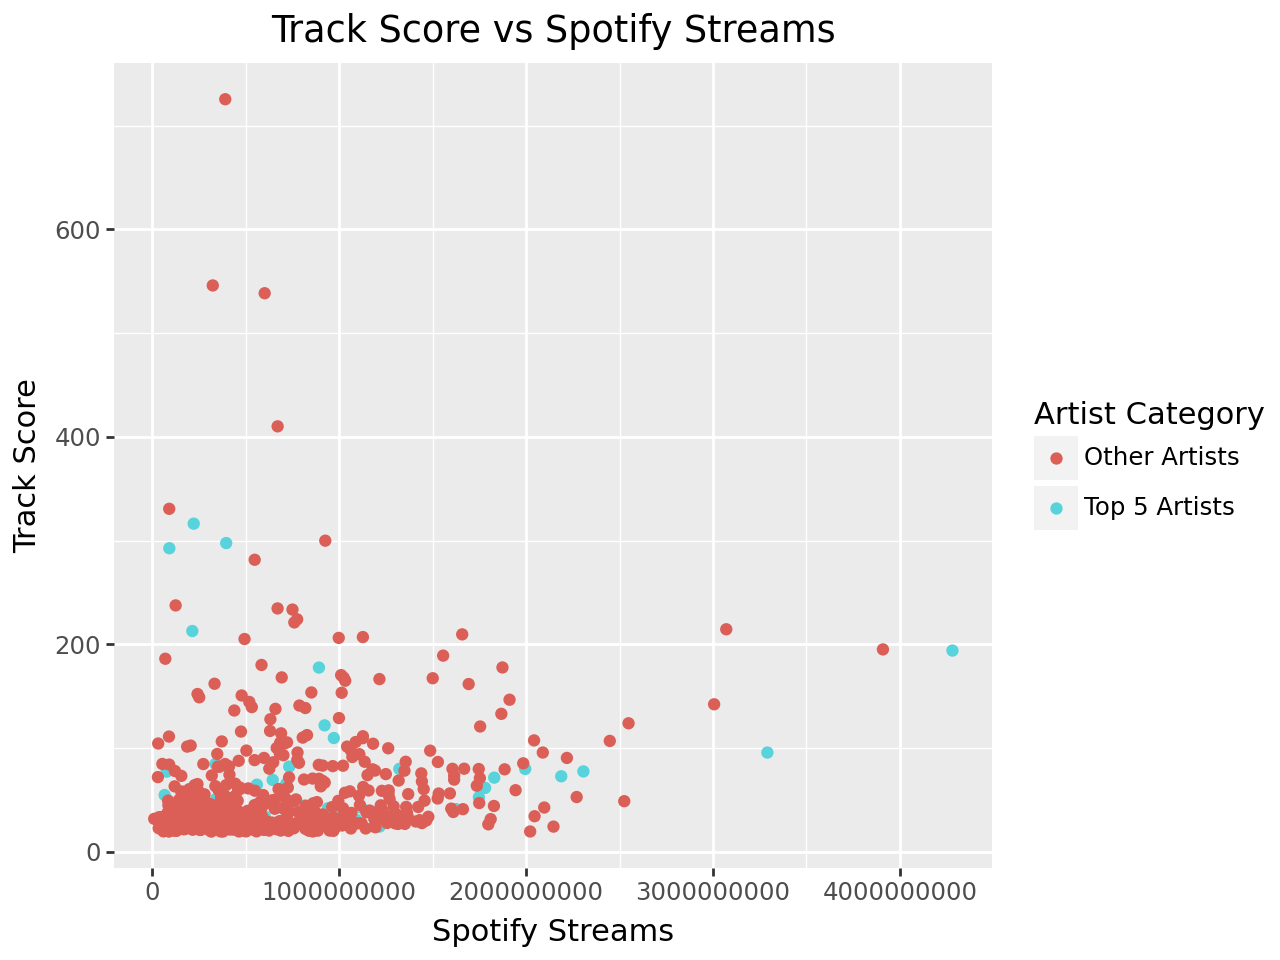

In [ ]:
#For Fun, Make a scatterplot making points that are songs with top 5 artists red and points that are songs with artists not in top 5 comparing Track Score and also having the ammount of spotify streams on there

top_5_df['Artist Category'] = 'Top 5 Artists'
other_artists_df['Artist Category'] = 'Other Artists'

combined_df = pd.concat([top_5_df, other_artists_df])



ggplot(combined_df, aes(x = 'Spotify Streams', y = 'Track Score', color = 'Artist Category')) + geom_point() + labs(title = 'Track Score vs Spotify Streams', x = 'Spotify Streams', y = 'Track Score', color = 'Artist Category')

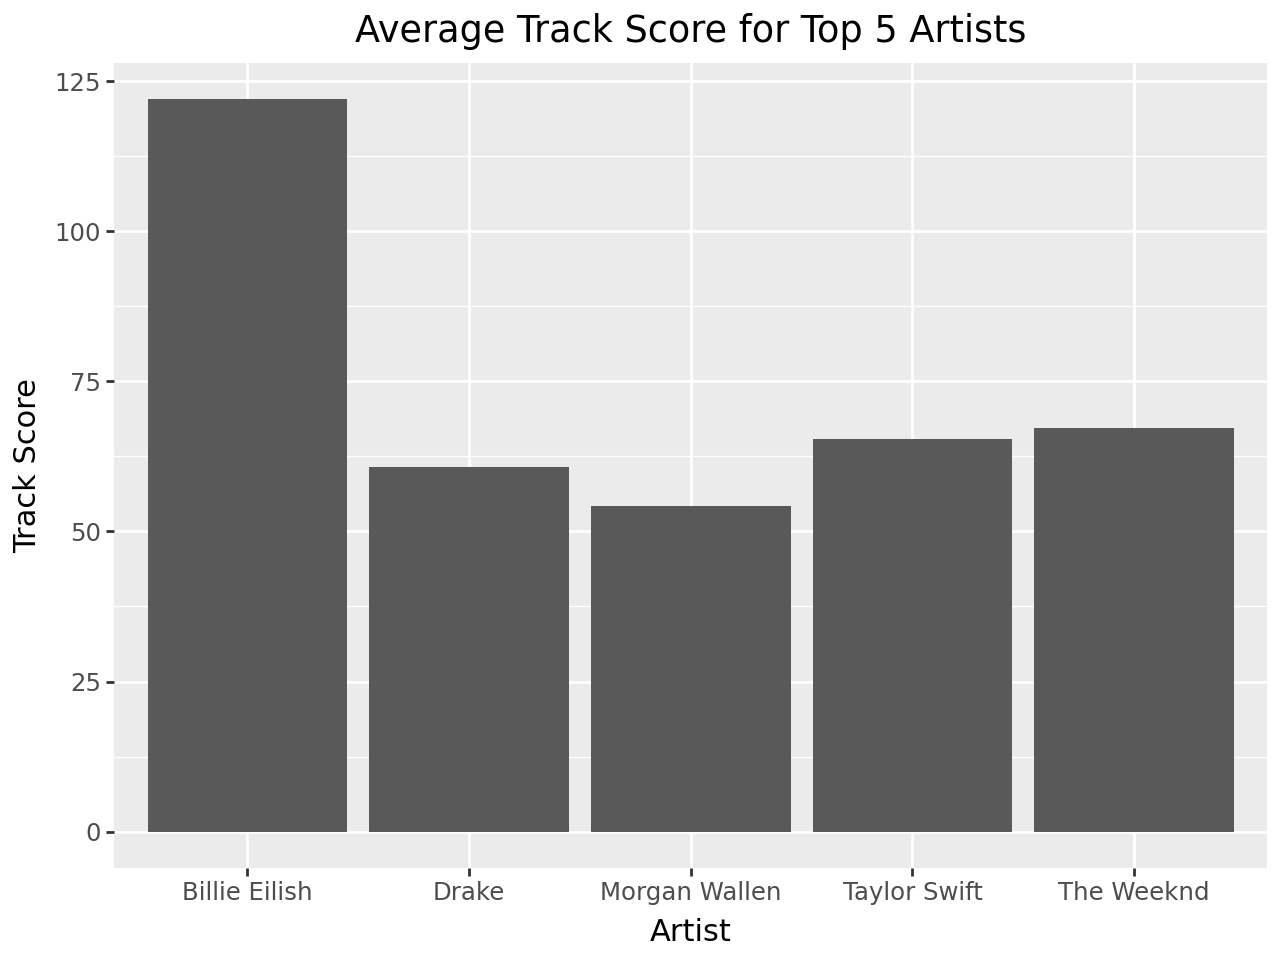

In [ ]:
#For Fun Just Seeing Which Top 5 Artist Had The Highest Rated Track

top_5_avg = top_5_df.groupby('Artist')['Track Score'].mean().reset_index()
(ggplot(top_5_avg, aes(x = 'Artist', y = 'Track Score'))
+ geom_bar(stat = 'identity', position = 'dodge')
+ labs(title = 'Average Track Score for Top 5 Artists', x = 'Artist', y = 'Track Score'))

**Conclusion**: After visualizing everything, its clear that the top 5 artists do get higher track scores than the rest of the pack. But this may be misleading because we can see when looking at the top 5 artists that Billie Eilish is carrying the top 5 average higher while the rest of the artists have track scores around the same as the rest of the pack. Like in the scatterplot, we can visualize it and see that there is not much disparity in track score with the top 5 artists compared to the rest. In conclusion, Billie Eilish is an outlier and is skewing our results to make it look like the top 5 artists have a higher average track score when in reality without her, they would just be average.

PROF NOTES ON QUESTION: Looks good

##Question 4: Do songs with explicit tracks tend to have better ratings than those that are not explicit?

###Variables Involved:
Explicit Track (Categorical), Track Score (Continous)

###Cleaning:
Any missing values will be dropped and we don’t need to z-score anything because we are not predicting anything we are only observing
About Confounding Variables (Artist, Genre, etc.): artist, genre, or album might influence ratings, so comparing explicit vs. non-explicit without controlling for those can introduce bias.


###Computation:
Use groupby to calculate average Track Score by explicit status: mean_scores = df.groupby('explicit')['track_score'].mean()

This will get the mean track score of the explicit and the clean songs and we can compare the numbers from there.

###Graphs:
- Histogram showing the disparity between the mean scores of explicit and un-explicit tracks
- Box Plot - Shows the distribution, median, and outliers. Great for comparing spread.


In [ ]:
mean_scores = data.groupby('Explicit Track')['Track Score'].mean()

print(mean_scores)

Explicit Track
0    59.024405
1    65.241921
Name: Track Score, dtype: float64


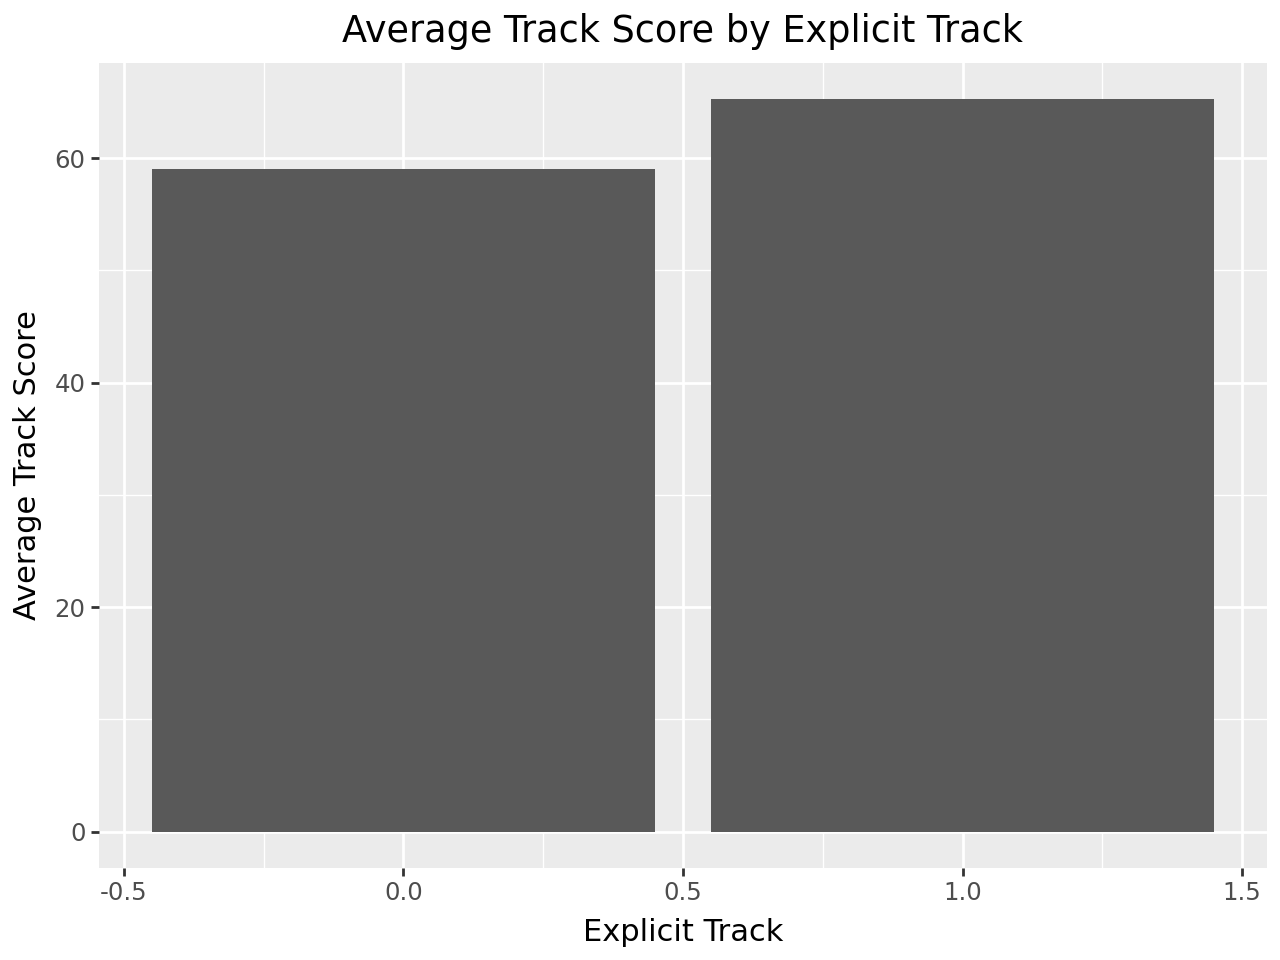

In [ ]:
# Convert the Series to a DataFrame with the explicit track status as a column
mean_scores_df = mean_scores.reset_index()

# Update the column names to be more descriptive if desired, e.g.,
mean_scores_df.columns = ['Explicit Track Status', 'Average Track Score']

ggplot(mean_scores_df, aes(x = 'Explicit Track Status', y = 'Average Track Score')) + geom_bar(stat = 'identity', position = 'dodge') + labs(title = 'Average Track Score by Explicit Track', x = 'Explicit Track', y = 'Average Track Score')

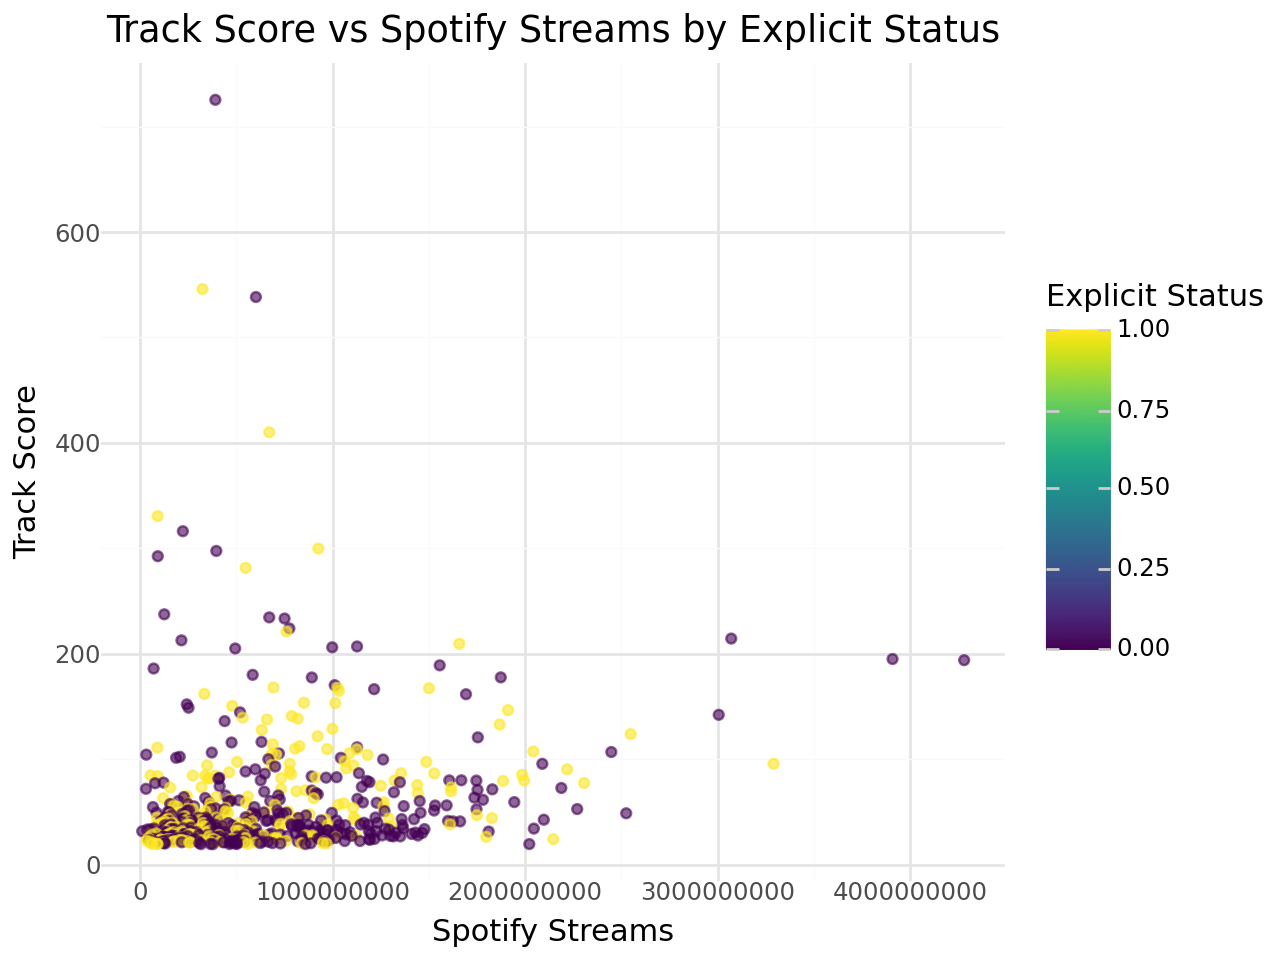

In [ ]:
ggplot(data, aes(x='Spotify Streams', y='Track Score', color='Explicit Track')) + \
    geom_point(alpha=0.6) + \
    labs(
        title='Track Score vs Spotify Streams by Explicit Status',
        x='Spotify Streams',
        y='Track Score',
        color='Explicit Status'
    ) + \
    theme_minimal()

Text(0.5, 1.0, 'Box Plot of Track Scores by Explicit Track Status')

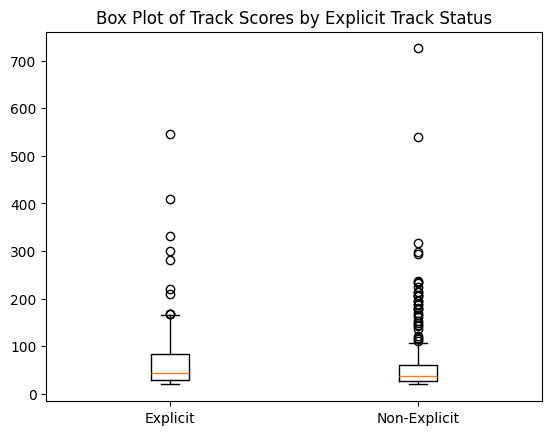

In [ ]:
df_explicit = data[data['Explicit Track'] == 1]
df_non_explicit = data[data['Explicit Track'] == 0]


plt.boxplot([df_explicit['Track Score'], df_non_explicit['Track Score']], labels=['Explicit', 'Non-Explicit'])
plt.title('Box Plot of Track Scores by Explicit Track Status')

PROF NOTES ON QUESTION:

* be ready to justify the choice of clustering algorithm used in the final report

##Question 5: What clusters emerge when studying Spotify streams, Spotify popularity, siriusXM spins, and airplay spins?

###Variables Involved:
Spotify Streams (continuous), Spotify Popularity (discrete), SiriusXM Spins(continuous), AirPlay Spins(continuous)

###Cleaning:
Missing values will be dropped, and the different features(Spotify Streams, Spotify Popularity, SiriusXM Spins, and Airplay Spins) will be z-scored.

###Model/ Computation:
I am going to create different models using two features at a time. Spotify Streams and SiriusXM Spins, then Spotify Streams and Airplay Spins, Spotify Popularity and SiriusXM Spins, and Spotify Popularity and Airplay Spins. Using the elbow method, I will figure out the appropriate number of clusters to use. After that, I will graph the cluster plot and interpret how cohesive and separated the clusters are, and compare the results from the different groups.

###Graphs:
- Scatter plot showing the relationship between Spotify Streams/Popularity and Sirus XM/Airplay Spins
- Elbow method plots for figuring out the number of clusters
Cluster plots



In [ ]:
predictors = ['Spotify Streams','Spotify Popularity','AirPlay Spins','SiriusXM Spins','Spotify Playlist Count','Spotify Playlist Reach']

# Convert predictors from strings to floats
X = data[predictors].copy()
# Remove commas
for col in predictors:
    X[col] = X[col].astype(str).str.replace(',', '', regex=False).astype(float)

#standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#gmm empty model
gmm = GaussianMixture(n_components = 3)

#fit and predict model
labels = gmm.fit_predict(X_scaled)
X["clusters"] = labels

X.head()

In [ ]:
aic_scores = []
k_range = range(1, 6)

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    aic_scores.append(gmm.aic(X))

# Plot
plt.plot(k_range, aic_scores, label='AIC', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('AIC')
plt.show()

In [ ]:
display(ggplot(X, aes(x="Spotify Streams", y="AirPlay Spins", color = "factor(clusters)")) +
geom_point() +
theme_minimal() + stat_smooth(method = "lm")
+labs(title = "Airplay Spins Vs. Spotify Streams"))

In [ ]:
display(ggplot(X, aes(x="Spotify Streams", y="SiriusXM Spins", color = "factor(clusters)")) +
geom_point() +
theme_minimal() + stat_smooth(method = "lm") +
labs(title = "SiriusXM Spins Vs. Spotify Streams"))

In [ ]:
display(ggplot(X, aes(x="Spotify Popularity", y="AirPlay Spins", color = "factor(clusters)")) +
geom_point() +
theme_minimal() + stat_smooth(method = "lm")+
labs(title = "Airplay Spins Vs. Spotify Popularity"))

In [ ]:
display(ggplot(X, aes(x="Spotify Streams", y="SiriusXM Spins", color = "factor(clusters)")) +
geom_point() +
theme_minimal() + stat_smooth(method = "lm") +
labs(title = "SiriusXM Spins Vs. Spotify Popularity"))

In [ ]:
hac = AgglomerativeClustering(linkage = "average",
                              metric = "cosine",
                              distance_threshold=0,
                              n_clusters = None) #Can come back and change the number of clusters
labels = hac.fit_predict(X_scaled)

#dendogram
def plot_dendrogram(hac, **kwargs):

    # create the counts of samples under each node
    counts = np.zeros(hac.children_.shape[0])
    n_samples = len(hac.labels_)
    for i, merge in enumerate(hac.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [hac.children_, hac.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    sch.dendrogram(linkage_matrix, **kwargs)


plot_dendrogram(hac, color_threshold = .4)



In [ ]:
# Train-Test-Split Model Validation with an 80/20 split

for column in ['Spotify Streams','Spotify Popularity','Spotify Playlist Count','Spotify Playlist Reach','AirPlay Spins','SiriusXM Spins']:
    data[column] = pd.to_numeric(data[column].astype(str).str.replace(',', ''))

x1 = data[['Spotify Streams','Spotify Popularity','Spotify Playlist Count','Spotify Playlist Reach']]
y1 = data['AirPlay Spins']

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state = 50)

In [ ]:
# Z-score predictors

scaler = StandardScaler()

xa_train = scaler.fit_transform(x_train[['Spotify Streams']])
xa_test  = scaler.transform(x_test[['Spotify Streams']])


In [ ]:
# Linear Regression Model

lin = LinearRegression()
lin_airplay = LinearRegression().fit(xa_train, y_train)

In [ ]:
# R2

r2_airplay_train = lin_airplay.score(xa_train, y_train)
r2_airplay_test  = lin_airplay.score(xa_test,  y_test)

print("R2 for Airplay Train:", r2_airplay_train)

print("R2 for Airplay Test:", r2_airplay_test)


In [ ]:
# Train-Test-Split Model Validation with an 80/20 split

for column in ['Spotify Streams','Spotify Popularity','Spotify Playlist Count','Spotify Playlist Reach','AirPlay Spins','SiriusXM Spins']:
    data[column] = pd.to_numeric(data[column].astype(str).str.replace(',', ''))

x2 = data[['Spotify Streams','Spotify Popularity','Spotify Playlist Count','Spotify Playlist Reach']]
y2 = data['SiriusXM Spins']

x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state = 50)

In [ ]:
# Z-score predictors

scaler = StandardScaler()

xs_train = scaler.fit_transform(x_train[['Spotify Streams']])
xs_test  = scaler.transform(x_test[['Spotify Streams']])



In [ ]:
# Linear Regression Model

lin = LinearRegression()

lin_siriusxm = LinearRegression().fit(xs_train, y_train)


In [ ]:
# R2

r2_siriusxm_train = lin_siriusxm.score(xs_train, y_train)
r2_siriusxm_test  = lin_siriusxm.score(xs_test,  y_test)


print("R2 for SiriusXM (Train):", r2_siriusxm_train)
print("R2 for SiriusXM Count (Test):", r2_siriusxm_test)


PROF NOTES ON QUESTION: Question isn't quite clear - analysis plan looks good though. I think the question might need to be reworded

##Question 6: Given the variables used to find the PCA to capture 90% of the variance,  is there a clear difference in what way a song is popular? (Spotify Streams vs. Tik Tok Videos, or something similar)

###Variables Involved:
Spotify Streams (continuous), TikTok Posts(continuous), TikTok Likes(continuous), Youtube Views(continuous), Youtube Likes(continuous) → only numeric data can be used, may add a couple more variables/features

###Cleaning:
Missing values will be dropped, and the different features(Spotify Streams, Spotify Popularity, SiriusXM Spins, and Airplay Spins) will be z-scored.

###Model/ Computation:
After doing TTS with an 80/20 split, I will create the PCA model. A scree plot will be plotted in order to identify the number of PCA’s that will be optimal. Since PCA is great with efficiency not so much interpretability, we will put the PCA components into a logistic regression and predict the outcomes. From here, we will be able to calculate the accuracy, precision, recall, F1, and the ROC AUC curve scores for the model. With each dimension of the PCA focusing more on a certain feature of what affects the popularity of a song, we will be able to in what ways a song is popular.


###Graphs:
- Scree plot → number of PCAs needed
- PCA loading plot → determines the kind of popularity a song has
- Scatterplot to see correlation



In [ ]:
#data cleaning
df6 = data[["Spotify Streams", "TikTok Posts", "TikTok Likes", "TikTok Views",
            "YouTube Likes",'Spotify Popularity',
            'Spotify Playlist Count','Spotify Playlist Reach',
            'YouTube Playlist Reach','Apple Music Playlist Count']]
df6

# Clean: remove commas and convert to numeric
# Remove commas and convert to float for each predictor column
# Corrected to use df6 instead of X for cleaning
for col in df6.columns: # Iterate through columns of df6
    df6[col] = df6[col].astype(str).str.replace(',', '', regex=False).astype(float)

#checking for null values
df6.isnull().sum()

# # Drop rows with missing values in either column
df6.dropna(inplace=True)

df6.head()

In [ ]:
feats = ["Spotify Streams", "TikTok Posts", "TikTok Likes", "TikTok Views",
            "YouTube Likes",'Spotify Popularity',
            'Spotify Playlist Count','Spotify Playlist Reach',
            'YouTube Playlist Reach','Apple Music Playlist Count']

# Select features from df6
X = df6[feats]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()

X_pca = pca.fit_transform(X_scaled)

X = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Determine the median popularity to create a binary target variable
median_popularity = df6["Spotify Popularity"].median()
y = (df6["Spotify Popularity"] > median_popularity).astype(int) # Create binary target

# tts
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

pca.fit(X_train) # Fit PCA on the training data
X_train_pca = pca.transform(X_train) # Transform training data
X_test_pca = pca.transform(X_test) # Transform test data


In [ ]:
#Cumulative and Scree Plot
pcaDF = pd.DataFrame({"expl_var" :
                      pca.explained_variance_ratio_,
                      "pc": range(1, pca.n_components_ + 1),
                      "cum_var":
                      pca.explained_variance_ratio_.cumsum()})

display(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point() +
 theme_minimal() + labs(x = "PCs", y = "Proportion of Explained Variance", title = "Scree Plot"))

display(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line() +
 geom_point() + geom_hline(yintercept = 0.9, color = "red", linetype = "dashed") +
 theme_minimal() + labs(x = "Number of PCs", y = "Cumulative Proportion of Explained Variance", title = "Cumulative Variance Plot"))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components = 5)
pca.fit(X_train)

# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

lr= LogisticRegression()
lr.fit(X_train_pca,y_train)

In [ ]:
y_pred_test = lr.predict(X_test_pca)
pca_plot_df = pd.DataFrame(X_test_pca[:, :2], columns=['PC1', 'PC2'])

pca_plot_df = pca_plot_df.reset_index(drop=True)

pca_plot_df['predicted_label'] = y_pred_test

#graph
display(ggplot(pca_plot_df, aes(x='PC1', y='PC2', color='factor(predicted_label)'))
+ geom_point()
+ labs(title='PC2 Vs. PC1',
         x='PC1',
         y='PC2')#,
         #color='Predicted Class')
+ theme_minimal())


In [ ]:
y_pred_train = lr.predict(X_train_pca)
y_pred_test  = lr.predict(X_test_pca)

y_pred_train_prob = lr.predict_proba(X_train_pca)[:,1]
y_pred_test_prob  = lr.predict_proba(X_test_pca)[:,1]

# assess
print("Train Acc       : ", accuracy_score(y_train, y_pred_train))
print("Train Prescision: ", precision_score(y_train, y_pred_train))
print("Train Recall    : ", recall_score(y_train, y_pred_train))
print("Train F1        : ", f1_score(y_train, y_pred_train))
print("Train ROC AUC   : ", roc_auc_score(y_train, y_pred_train_prob))
print("")
print("Test Acc        : ", accuracy_score(y_test, y_pred_test))
print("Test Prescision : ", precision_score(y_test, y_pred_test))
print("Test Recall     : ", recall_score(y_test, y_pred_test))
print("Test F1         : ", f1_score(y_test, y_pred_test))
print("Test ROC AUC    : ", roc_auc_score(y_test, y_pred_test_prob))

In [ ]:
display(ggplot(df6, aes(x="TikTok Views", y="Spotify Streams")) +#, color = "factor(clusters)")) +
geom_point() +
theme_minimal() + stat_smooth(method = "lm") +
labs(title = "Spotify Streams Vs. TikTok Views"))

In [ ]:
display(ggplot(df6, aes(x="YouTube Likes", y="Spotify Streams")) +#, color = "factor(clusters)")) +
geom_point() +
theme_minimal() + stat_smooth(method = "lm") +
labs(title = "Spotify Streams Vs. YouTube Likes"))

In [ ]:
display(ggplot(df6, aes(x="TikTok Likes", y="Spotify Popularity")) +#, color = "factor(clusters)")) +
geom_point() +
theme_minimal() + stat_smooth(method = "lm") +
labs(title = "Spotify Popularity Vs. TikTok Likes"))

In [ ]:
#90% var

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components = 0.9)
pca.fit(X_train)

# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_pca,y_train)

y_pred_train = lr.predict(X_train_pca)
y_pred_test  = lr.predict(X_test_pca)

y_pred_train_prob = lr.predict_proba(X_train_pca)[:,1]
y_pred_test_prob  = lr.predict_proba(X_test_pca)[:,1]

# assess
print("Train Acc       : ", accuracy_score(y_train, y_pred_train))
print("Train Prescision: ", precision_score(y_train, y_pred_train))
print("Train Recall    : ", recall_score(y_train, y_pred_train))
print("Train F1        : ", f1_score(y_train, y_pred_train))
print("Train ROC AUC   : ", roc_auc_score(y_train, y_pred_train_prob))
print("")
print("Test Acc        : ", accuracy_score(y_test, y_pred_test))
print("Test Prescision : ", precision_score(y_test, y_pred_test))
print("Test Recall     : ", recall_score(y_test, y_pred_test))
print("Test F1         : ", f1_score(y_test, y_pred_test))
print("Test ROC AUC    : ", roc_auc_score(y_test, y_pred_test_prob))

PROF NOTES ON QUESTION: Looks good


##Question 7: Does more likes across social media platforms (YouTube and TiKTok) predict the number of streams a song will receive on Spotify?

###Variables Involved:
Spotify Streams (continuous), YouTube likes(continuous), TikTok likes(continuous)

###Cleaning:
Any missing values will be dropped, and there will be no one-hot encoding since there are no categorical variables

###Model/ Computation:
I will do model validation through TTS with a 80/20 ratio. Categorical variables will be z-scored. I will create two separate linear regression models using YouTube likes as one of the predictors and the other using TikTok likes for the other model. R2, MAE and MSE will be used to assess the performance of both models.

###Graphs:
- Scatter plot showing the relationship between YouTube likes and Spotify streams
- Scatter plot showing the relationship between TikTok Likes and Spotify streams


In [ ]:
df7 = pd.read_csv("Most Streamed Spotify Songs 2024.csv", encoding='latin1')
df7 = df7[["Spotify Streams", "YouTube Likes"]]
df7

# Clean: remove commas and convert to numeric
df7["Spotify Streams"] = df7["Spotify Streams"].str.replace(',', '')
df7["YouTube Likes"] = df7["YouTube Likes"].str.replace(',', '')


df7["Spotify Streams"] = pd.to_numeric(df7["Spotify Streams"], errors='coerce')
df7["YouTube Likes"] = pd.to_numeric(df7["YouTube Likes"], errors='coerce')


#checking for null values
df7.isnull().sum()

# # Drop rows with missing values in either column
df7.dropna(inplace=True)

# Remove top 1% of outliers in both columns
Ylikes_threshold = df7["YouTube Likes"].quantile(0.99)
streams_threshold = df7["Spotify Streams"].quantile(0.99)

df7 = df7[(df7["YouTube Likes"] < Ylikes_threshold) &
          (df7["Spotify Streams"] < streams_threshold)]

In [ ]:
#building linear regression for youtube likes
X = df7[["YouTube Likes"]]
y = df7["Spotify Streams"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Z-score (standardize) the predictors
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# Create and fit regression model
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

# Predict on train and test
y_pred_train = lr1.predict(X_train)
y_pred_test = lr1.predict(X_test)

In [ ]:
print("Train MSE : ", mean_squared_error(y_train,y_pred_train))
print("Train MAE : ", mean_absolute_error(y_train,y_pred_train))
print("Train R2  : ", r2_score(y_train,y_pred_train))
print()
print("Test MSE  : ", mean_squared_error(y_test,y_pred_test))
print("Test MAE  : ", mean_absolute_error(y_test,y_pred_test))
print("Test R2   : ", r2_score(y_test,y_pred_test))

In [ ]:
display(
    ggplot(df7, aes(x="YouTube Likes", y="Spotify Streams")) +
    geom_point(alpha=0.5, color="#0072B2", size=1.5) +
    theme_minimal() +
    labs(
        title="Relationship Between YouTube Likes and Spotify Streams",
        x="YouTube Likes (in Millions)",
        y="Spotify Streams (in Millions)"
    ) +
    scale_x_continuous(labels=lambda l: [f'{v/1e6:.0f}M' for v in l]) +
    scale_y_continuous(labels=lambda l: [f'{v/1e6:.0f}M' for v in l]) +
    theme(
        figure_size=(8, 5),
        plot_title=element_text(size=14, weight='bold'),
        axis_title_x=element_text(size=12),
        axis_title_y=element_text(size=12),
        axis_text=element_text(size=10)
    )
)

In [ ]:
df7_2 = pd.read_csv("Most Streamed Spotify Songs 2024.csv", encoding='latin1')

# Keep relevant columns
df7_2 = df7_2[["Spotify Streams", "TikTok Likes"]]

# Remove commas and convert to numeric
df7_2["Spotify Streams"] = df7_2["Spotify Streams"].str.replace(',', '', regex=False)
df7_2["TikTok Likes"] = df7_2["TikTok Likes"].str.replace(',', '', regex=False)

df7_2["Spotify Streams"] = pd.to_numeric(df7_2["Spotify Streams"], errors='coerce')
df7_2["TikTok Likes"] = pd.to_numeric(df7_2["TikTok Likes"], errors='coerce')

# Drop missing values
df7_2.dropna(inplace=True)

# Remove top 1% of outliers in both columns
likes_threshold = df7_2["TikTok Likes"].quantile(0.99)
streams_threshold = df7_2["Spotify Streams"].quantile(0.99)

df7_2 = df7_2[(df7_2["TikTok Likes"] < likes_threshold) &
          (df7_2["Spotify Streams"] < streams_threshold)]

# Define features and target
X = df7_2[["TikTok Likes"]]
y = df7_2["Spotify Streams"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# Build and train model
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

# Predict
y_pred_train = lr2.predict(X_train)
y_pred_test = lr2.predict(X_test)

# Evaluate
print("Train MSE : ", mean_squared_error(y_train, y_pred_train))
print("Train MAE : ", mean_absolute_error(y_train, y_pred_train))
print("Train R2  : ", r2_score(y_train, y_pred_train))
print()
print("Test MSE  : ", mean_squared_error(y_test, y_pred_test))
print("Test MAE  : ", mean_absolute_error(y_test, y_pred_test))
print("Test R2   : ", r2_score(y_test, y_pred_test))

In [ ]:
display(
    ggplot(df7_2, aes(x="TikTok Likes", y="Spotify Streams")) +
    geom_point(alpha=0.5, color="#0072B2", size=1.5) +
    theme_minimal() +
    labs(
        title="Relationship Between TikTok Likes and Spotify Streams",
        x="TikTok Likes (in Millions)",
        y="Spotify Streams (in Millions)"
    ) +
    scale_x_continuous(labels=lambda l: [f'{v/1e6:.0f}M' for v in l]) +
    scale_y_continuous(labels=lambda l: [f'{v/1e6:.0f}M' for v in l]) +
    theme(
        figure_size=(8, 5),
        plot_title=element_text(size=14, weight='bold'),
        axis_title_x=element_text(size=12),
        axis_title_y=element_text(size=12),
        axis_text=element_text(size=10)
    )
)

PROF NOTES ON QUESTION: Be ready to justify which clustering algorithm you settle on in the final report


##Question 8: When clustering songs based on social media metrics, do the resulting groups differ in their average AirPlay Spins, and which clustering method produces clearer group differences?

###Variables Involved:
Airplay spins (continuous), Youtube views(continuous), Youtube likes(continuous), TikTok posts(continuous), TikTok likes(continuous), TikTok views(continuous), Youtube playlist reach(continuous)

###Cleaning:
Any missing values will be dropped, and there will be no one-hot encoding since there are no categorical variables

###Model/ Computation:
Two models will be created with the same variables (K-means & DBSCAN), the average airplay per cluster will be calculated per cluster per model. Separation, Cohesion, and Silhouette scores will be used to assess the models.

###Graphs:
- A box plot showing the average airplay spins for each cluster. Comparing the two models together
- Using any of the two online metrics, show a scatter plot of the clusters and color code each cluster for the model that has the best performance


In [ ]:
df8 = pd.read_csv("Most Streamed Spotify Songs 2024.csv", encoding='latin1')

# Select relevant columns (you had a typo — use df8 not df7)
df8 = df8[["AirPlay Spins", "YouTube Views", "YouTube Likes",
           "TikTok Posts", "TikTok Likes", "TikTok Views",
           "YouTube Playlist Reach"]]

# Remove commas and convert to numeric
for col in df8.columns:
    df8[col] = df8[col].str.replace(',', '', regex=False)
    df8[col] = pd.to_numeric(df8[col], errors='coerce')

# Drop rows with missing values
df8.dropna(inplace=True)

# Remove top 1% outliers **for each column**
for col in df8.columns:
    threshold = df8[col].quantile(0.99)
    df8 = df8[df8[col] < threshold]

# Display cleaned dataset
df8

In [ ]:
predictors = ['YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach']


display(ggplot(df8, aes(x = 'YouTube Views', y = 'YouTube Likes'))
    + geom_point()
    + theme_minimal()
    + labs(title = "YouTube Views v YouTube Likes"))

display(ggplot(df8, aes(x = 'TikTok Posts', y = 'TikTok Likes'))
    + geom_point()
    + theme_minimal()
    + labs(title = "TikTok Posts v TikTok Likes"))

display(ggplot(df8, aes(x = 'YouTube Playlist Reach', y = 'YouTube Views'))
    + geom_point()
    + theme_minimal()
    + labs(title = "YouTube Playlist Reach v YouTube Views"))




In [ ]:
# Define predictors adding 'Cluster' column
predictors = df8.columns.tolist()

X = df8[predictors]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN clustering
db = DBSCAN(eps=1.5, min_samples=10)
labels = db.fit_predict(X_scaled)
df8["Cluster"] = labels

print(silhouette_score(X_scaled, df8["Cluster"]))

In [ ]:
from sklearn.neighbors import NearestNeighbors

min_samples = 15
nn = NearestNeighbors(n_neighbors = min_samples + 1)
nn.fit(X_scaled)  # X_scaled = your standardized full feature set

# Get distances to k-th nearest neighbor
distances, _ = nn.kneighbors(X_scaled)
k_distances = np.sort(distances[:, min_samples])

# Plot elbow curve
plt.figure(figsize=(10, 5))
plt.plot(k_distances)
plt.axhline(y=1.5, color='red', linestyle='--', label='eps = 1.5')
plt.title("Elbow Method for Choosing eps")
plt.xlabel("Points (sorted)")
plt.ylabel(f"Distance to {min_samples}th Nearest Neighbor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
db = DBSCAN(eps = 1.0, min_samples = 7)

# fit
labels = db.fit_predict(X_scaled)

# Add cluster labels to df
X["clusters"] = labels

print(silhouette_score(X[predictors], X["clusters"]))

display(ggplot(X, aes(x = "YouTube Views", y = "YouTube Likes", color = "factor(clusters)" )) +
      geom_point() + theme_minimal() +
     labs(x = "YouTube Views", y = "YouTube Likes", title = "DBSCAN Clustering Results for eps = 1.0, min_samples = 7",
         color = "Clusters"))

In [ ]:
print(X["clusters"].value_counts())

# Cluster means for original (unscaled) data
df8["clusters"] = X["clusters"]
summary = df8.groupby("clusters").mean().round(2)
print(summary)

In [ ]:
# create dictionary to
metrics = {"sil": [], "k": []}

for i in range(2,20):
    km = KMeans(i)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)

    metrics["sil"].append(sil)
    metrics["k"].append(i)

df8_2 = pd.DataFrame(metrics)

In [ ]:
display(ggplot(df8_2, aes(x = "k", y = "sil")) +
  geom_line() + theme_minimal() +
    labs(x = "K", y = "Mean Silhouette Score",
         title = "Silhouette Scores for Different Ks"))

In [ ]:
km = KMeans(2)
labels = km.fit_predict(X_scaled)

X["cluster"] = labels
display(ggplot(X, aes(x = "YouTube Views", y = "YouTube Likes", color = "factor(cluster)")) +
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = "Cluster") +
      labs(x = "YouTube Views", y = "YouTube Likes",title = "2 Cluster Solution"))

In [ ]:
silhouette_kmeans = silhouette_score(X_scaled, labels)
print(f"Silhouette Score for KMeans (k=2): {silhouette_kmeans:.4f}")